<a href="https://colab.research.google.com/github/tuhintiwari/validere_2022/blob/main/validere_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why are houses so expensive in Toronto?** 
There has been a lot of public debate recently about housing prices in Toronto. The cost of living is becoming unaffordable for many Torontonians and home ownership has become unfeasible for a growing percentage of the population. There have been lots of explanations offered and solutions presented from across the political spectrum, yet the data underlying many of
these arguments seems surprisingly scarce and the arguments surprisingly
non-quantitative. Using any means accessible to you as a private citizen, and any data available that you deem relevant, can you propose what you think is the most important cause of high prices (e.g. lack of supply, lending policy, speculation/foreign ownership, tax policy etc.). Based on this, what are one or two policy proposals that are most likely to reduce housing prices by the largest magnitude? (Note: Don’t worry about potential adverse side effects of such proposals. The goal of the exercise is to come up with a
good simplified model of the housing market, not to come up with policy proposals you would necessarily vote for.).

Step 1: Scrape data related to sale of houses in the past 5 years - Toronto \\
Step 2: Scrape data related to immigration over the past 5 years \\
Step 3: Scrape data related to rate of interest and other lending patterns \\
Step 4: Scrape data related to land availability \\
Step 5: Scrape data from surveys about people's needs in terms of housing \\
Step 6: External factors such as COVID's affect \\
Step 7: Political aspect \\
Step 8: Data on foreign ownership \\
Step 9: Assimmilate all the data above and arrange the factors as features and price increase as the target \\
Step 10: Create feature importance by creating a model for price increase over the past 2 or 5 years (depending upon the data)

In [ ]:
!pip install selenium
!pip install beautifulsoup4
!apt-get update 
!apt install chromium-chromedriver

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
#Web Scraped data from https://toronto.listing.ca/real-estate-price-history.htm
url = "https://toronto.listing.ca/real-estate-price-history.htm"
driver.get(url)
condo_url = "https://toronto.listing.ca/condo-price-history.htm"
condo_town_url = "https://toronto.listing.ca/condo-townhouse-price-history.htm"
free_town_url = "https://toronto.listing.ca/freehold-townhouse-price-history.htm"
det_url = "https://toronto.listing.ca/detached-home-price-history.htm"

In [ ]:
res = driver.page_source.encode('utf-8')
soup = BeautifulSoup(res, "html.parser")

In [ ]:
dfs = pd.read_html(url, header = 0)
cond_dfs = pd.read_html(condo_url, header = 0)
towncondo_dfs = pd.read_html(condo_town_url, header = 0)
townfree_dfs = pd.read_html(free_town_url, header = 0)
det_dfs = pd.read_html(det_url, header = 0)

In [ ]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September': 9, 'October':10, 'November':11, 'December':12}
  

In [ ]:
def cleanup_arr_to_df(dfs, house_type):
    df1, df2, df3, df4, df5, df6, df7, df8, df9, df10 = dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9], dfs[10]
    df1['Year'] = 2021
    df2['Year'] = 2020
    df3['Year'] = 2019
    df4['Year'] = 2018
    df5['Year'] = 2017
    df6['Year'] = 2016
    df7['Year'] = 2015
    df8['Year'] = 2014
    df9['Year'] = 2013
    df10['Year'] = 2012

    df_merged = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
    # if you want to operate on multiple columns, put them in a list like so:
    cols = ['Avg List Price', 'Avg Sold Price', 'Monthly Change ($)', 'Above/Below Asking', 'Monthly Change (%)']

    # pass them to df.replace(), specifying each char and it's replacement:
    df_merged[cols] = df_merged[cols].replace({'\$': '', '%': '', ',':''}, regex=True)
    df_merged[cols] = df_merged[cols].astype('float')
    #df_merged['month_int'] = df_merged['Month'].map(d)

    df_merged['house_type'] = house_type

    df_merged['month_int'] = pd.to_datetime(df_merged.Month, format='%B').dt.month
    df_merged['Year'] = pd.to_datetime(df_merged.Year, format='%Y').dt.year
    df_merged['month_year_int'] = pd.to_datetime(df_merged.month_int.map(str) + '-' + df_merged.Year.map(str))
    df_merged['quarter_year'] = 'Q' + df_merged['month_year_int'].dt.quarter.map(str) + '-' + df_merged.Year.map(str)
    df_merged['month_year'] = pd.to_datetime((df_merged.month_int.map(str) + '-' + df_merged.Year.map(str)), format='%m-%Y').dt.strftime('%b-%Y')
    df_merged = df_merged.sort_values(by =['month_year_int'])
    return df_merged


In [ ]:
df_condo = cleanup_arr_to_df(cond_dfs, 'condo')
df_town_condo = cleanup_arr_to_df(towncondo_dfs , 'townhouse_condo')
df_free_town = cleanup_arr_to_df(townfree_dfs, 'freehold_townhouse')
df_det = cleanup_arr_to_df(det_dfs, 'detached')
df_all_years_price_change = pd.concat([df_condo, df_town_condo, df_free_town, df_det])

In [ ]:
df_all_years_price_change.head(2)

,Month,# of Sales,Avg List Price,Avg Sold Price,Above/Below Asking,Monthly Change ($),Monthly Change (%),Days on Market,Year,house_type,month_int,month_year_int,quarter_year,month_year
119,January,796,319000.0,314000.0,-1.56,314000.0,0.00,25.0,2012,condo,1,2012-01-01,Q1-2012,Jan-2012
118,February,1261,334000.0,328000.0,-1.79,14000.0,4.45,18.0,2012,condo,2,2012-02-01,Q1-2012,Feb-2012


In [ ]:
df_condo.head(2)

,Month,# of Sales,Avg List Price,Avg Sold Price,Above/Below Asking,Monthly Change ($),Monthly Change (%),Days on Market,Year,house_type,month_int,month_year_int,quarter_year,month_year
119,January,796,319000.0,314000.0,-1.56,314000.0,0.00,25.0,2012,condo,1,2012-01-01,Q1-2012,Jan-2012
118,February,1261,334000.0,328000.0,-1.79,14000.0,4.45,18.0,2012,condo,2,2012-02-01,Q1-2012,Feb-2012


In [ ]:
df_det.head(2)

,Month,# of Sales,Avg List Price,Avg Sold Price,Above/Below Asking,Monthly Change ($),Monthly Change (%),Days on Market,Year,house_type,month_int,month_year_int,quarter_year,month_year
119,January,625,569900.0,571000.0,0.19,571000.0,0.00,9.0,2012,detached,1,2012-01-01,Q1-2012,Jan-2012
118,February,1006,619900.0,648400.0,4.59,77400.0,13.55,8.0,2012,detached,2,2012-02-01,Q1-2012,Feb-2012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

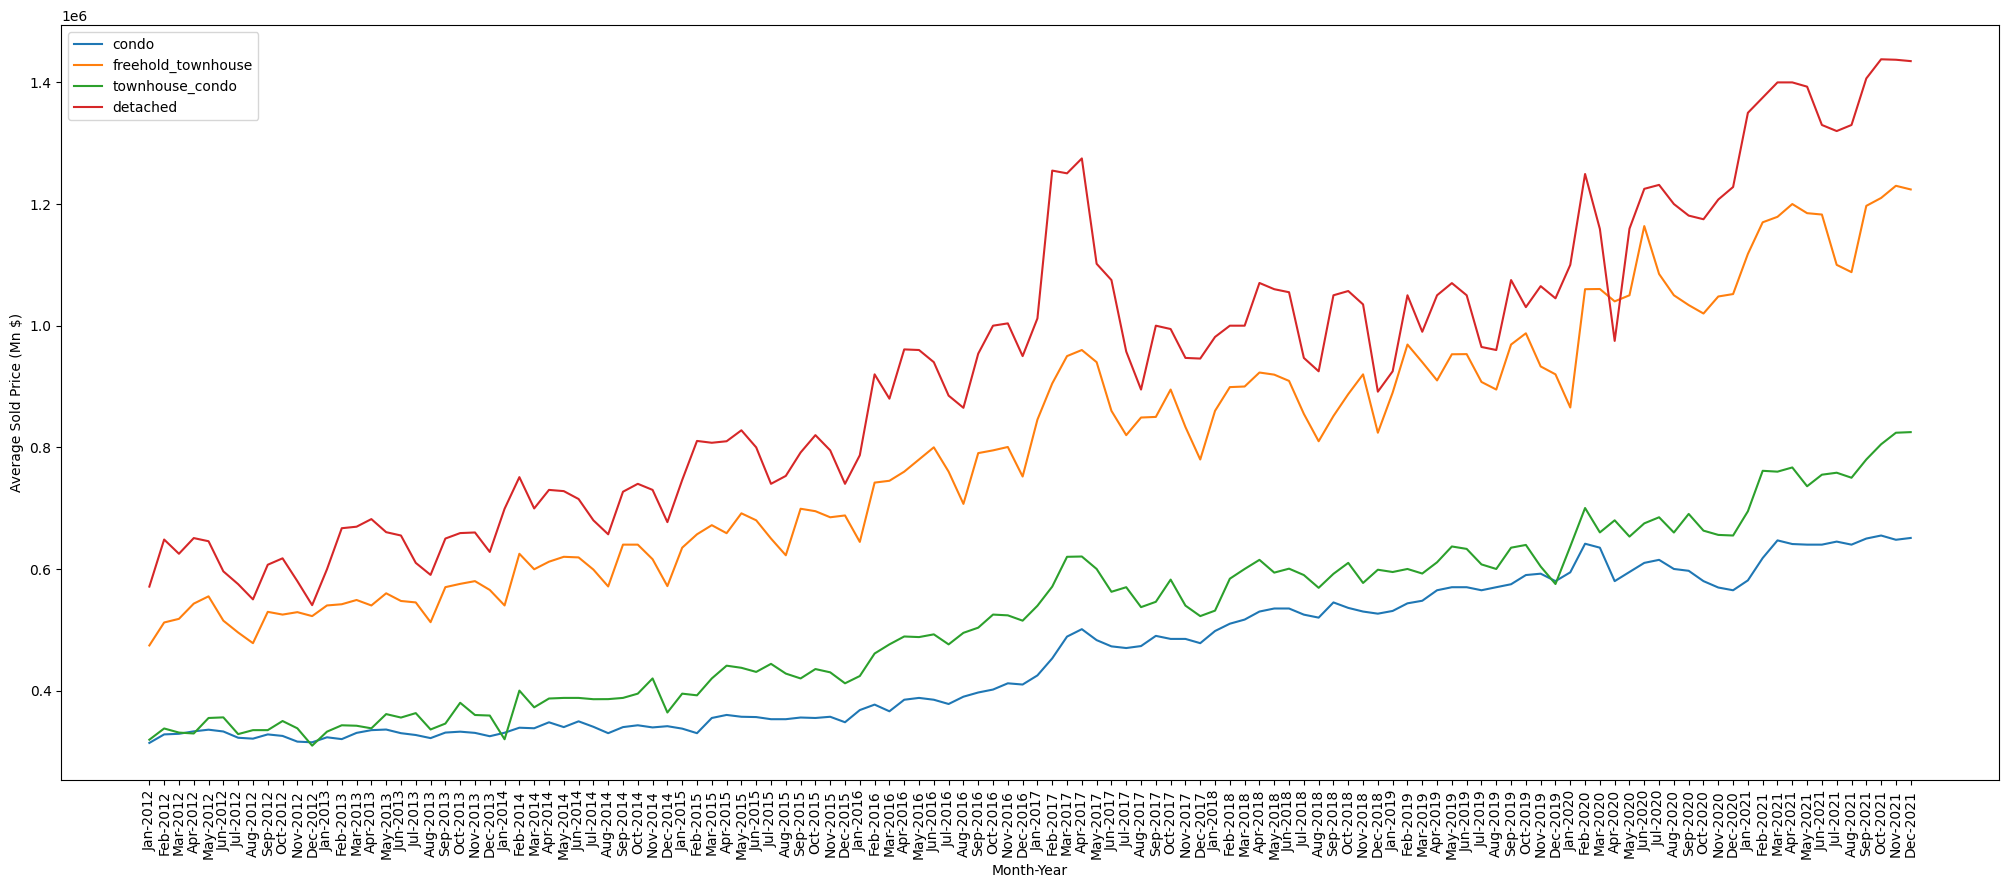

In [ ]:
import seaborn as sns
house_type_set = set(df_all_years_price_change['house_type'])


plt.figure(figsize=(25,10))
for h_type in house_type_set:
  selected_data = df_all_years_price_change.loc[df_all_years_price_change['house_type'] == h_type]
  sns.lineplot(selected_data['month_year'], selected_data['Avg Sold Price'], label=h_type)

plt.xlabel('Month-Year')
plt.ylabel('Average Sold Price (Mn $)')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


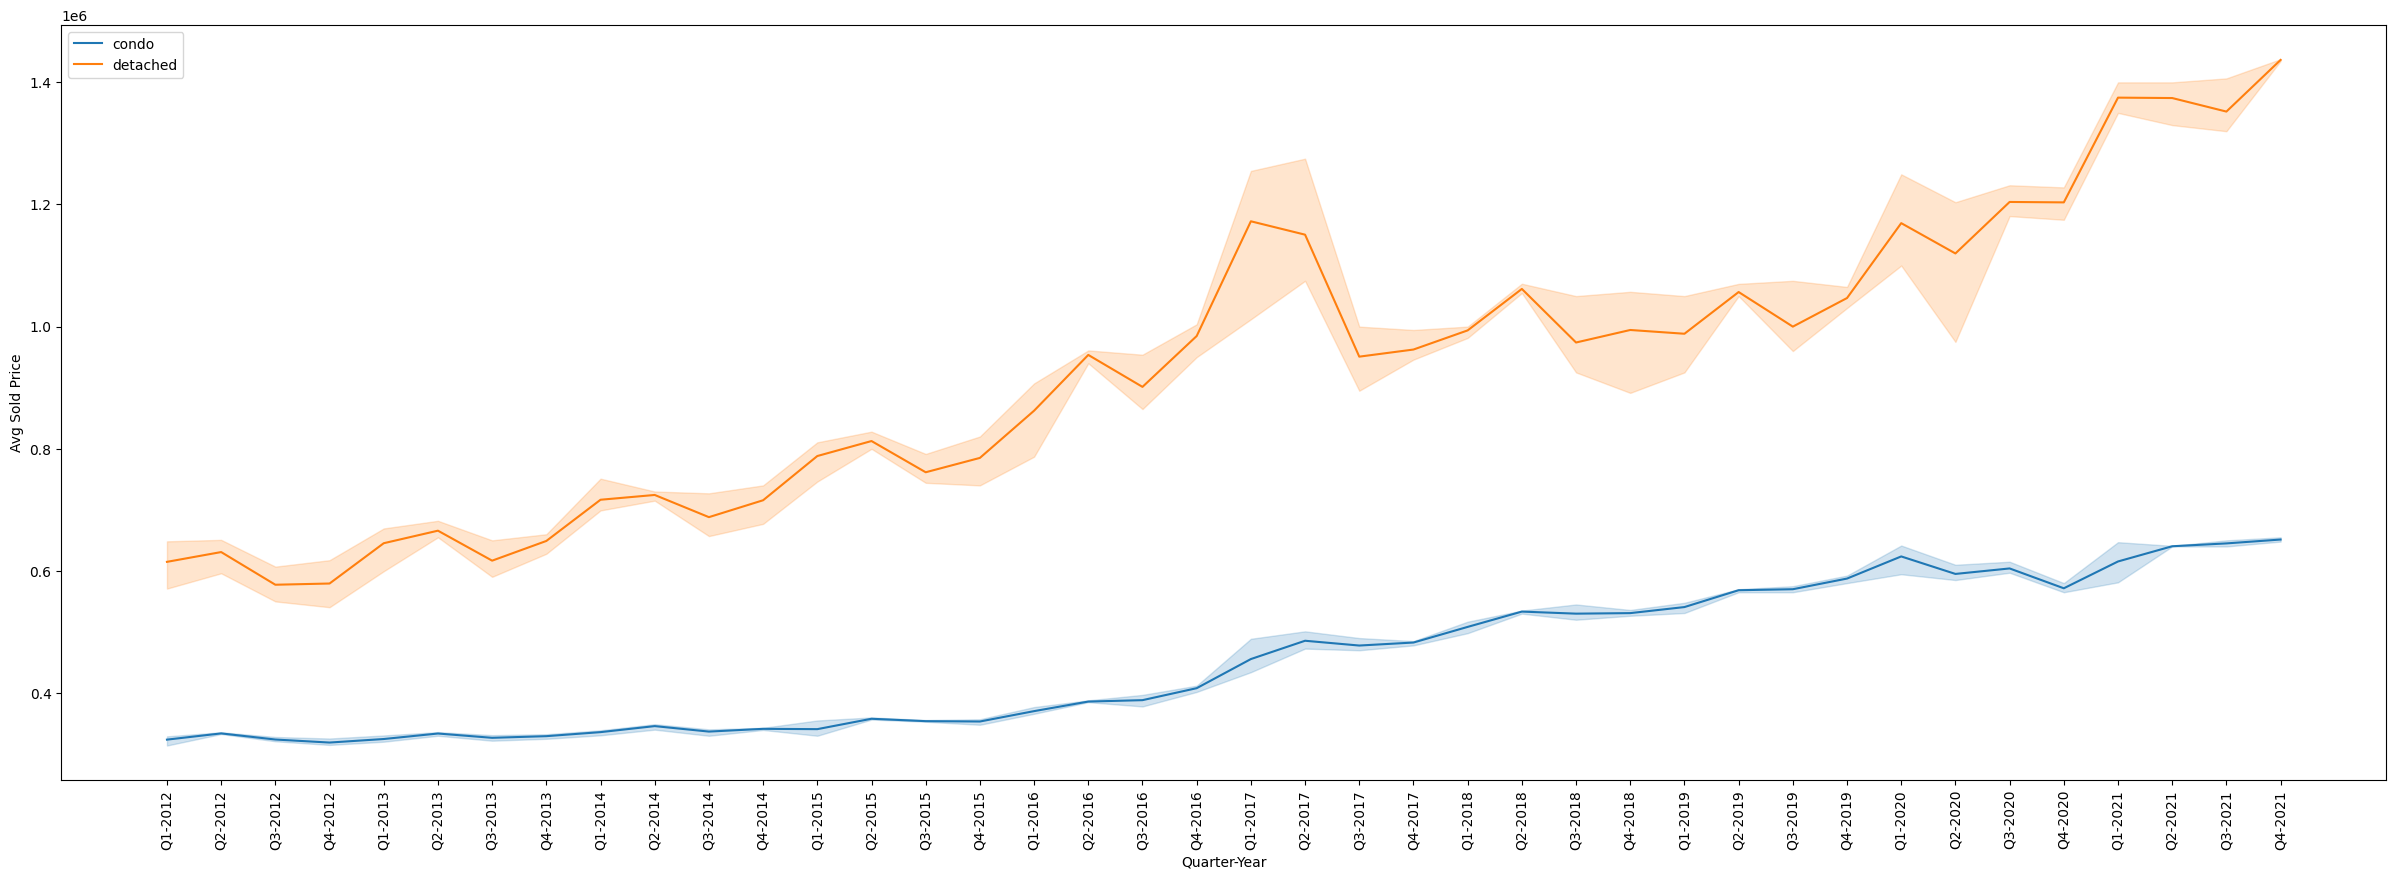

In [ ]:
import seaborn as sns
#house_type_set = set(df_all_years_price_change['house_type'])
house_type_set = ['condo','detached']

plt.figure(figsize=(30,10))
for h_type in house_type_set:
  selected_data = df_all_years_price_change.loc[df_all_years_price_change['house_type'] == h_type]
  sns.lineplot(selected_data['quarter_year'], selected_data['Avg Sold Price'], label=h_type)

plt.xlabel('Quarter-Year')
plt.ylabel('Avg Sold Price')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
#house_type_set = set(df_all_years_price_change['house_type'])
house_type_set = ['condo','detached']

plt.figure(figsize=(30,10))
for h_type in house_type_set:
  selected_data = df_all_years_price_change.loc[df_all_years_price_change['house_type'] == h_type]
  sns.lineplot(selected_data['month_year'], selected_data['Days on Market'], label=h_type)

plt.xlabel('Month-Year')
plt.ylabel('Days on Market')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
rate_of_interest_monthly = pd.read_excel('/content/drive/MyDrive/Colab_Data/Toronto_Real_Estate/roi_boc.xlsx')

In [ ]:
rate_of_interest_monthly

In [ ]:
roi_df_merged = pd.merge(df_all_years_price_change, rate_of_interest_monthly, how='right', on=['Month', 'Year'])
roi_df_merged = roi_df_merged.sort_values(by = ['month_year_int'])

In [ ]:
roi_df_merged.tail(2)

In [ ]:
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})
plt.title('Days on Market Vs Rate of Interest')
#plt.scatter(roi_df_merged['Days on Market'], roi_df_merged['month_year'], c=roi_df_merged['rate_of_interest'], cmap='Spectral')
plt.scatter(roi_df_merged['Days on Market'], roi_df_merged['rate_of_interest'], c=roi_df_merged['Days on Market'], cmap='Spectral')

plt.colorbar()
plt.xlabel('Days on Market')
plt.ylabel('rate_of_interest')
plt.show()

In [ ]:
roi_set = set(roi_df_merged['rate_of_interest'])

plt.figure(figsize=(15,10))
for roi in roi_set:
    selected_data = roi_df_merged.loc[roi_df_merged['rate_of_interest'] == roi]
    plt.scatter(pd.datetime(selected_data['Year']).dt.year, selected_data['Days on Market'], label=roi)

plt.xlabel('Year')
plt.ylabel('Avg Days on Market')
plt.legend()
plt.show()

In [ ]:
#plt.hist(df_condo['# of Sales'], density=True, bins=30)  # density=False would make counts
dfg = df_all_years_price_change.groupby(['Year', 'house_type'])['# of Sales'].sum().reset_index()

plt.figure(figsize=(30,10))
dfg.plot(x="house_type", y=['# of Sales'], kind="bar")
plt.show()
#dfg.plot.bar(rot=0)
#sns.barplot(kind='bar', title='Total num of Sales Yearly (Condo)', y='Year', x='# of Sales', hue="house_type", data = dfg)
#dfg

In [ ]:
#plt.hist(df_condo['# of Sales'], density=True, bins=30)  # density=False would make counts
dfg = df_condo.groupby(['Year'])['# of Sales'].sum()

dfg.plot(kind='bar', title='Total num of Sales Yearly (Condo)', ylabel='Year',
         xlabel='Num of Sales', figsize=(6, 5))

In [ ]:
#plt.hist(df_condo['# of Sales'], density=True, bins=30)  # density=False would make counts
dfg = df_det.groupby(['Year'])['# of Sales'].sum()

dfg.plot(kind='bar', title='Total num of Sales Yearly (Detached)', ylabel='Year',
         xlabel='Num of Sales', figsize=(6, 5))

In [ ]:
#plt.hist(df_condo['# of Sales'], density=True, bins=30)  # density=False would make counts
dfg = df_town_condo.groupby(['Year'])['# of Sales'].sum()

dfg.plot(kind='bar', title='Total num of Sales Yearly (Townhouse)', ylabel='Year',
         xlabel='Num of Sales', figsize=(6, 5))

In [ ]:
import requests

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "a962dfa3-8c87-4a4e-a408-82cf1ebc50bd"}
package = requests.get(url, params = params).json()
print(package["result"])